In [2]:
import sys
sys.path.append("../")
import cv2
import numpy as np
import pandas as pd
import sys
from PIL import Image
from image_foveation import foveat_img

import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline

In [6]:
objectinfo150_path = "../ADEChallengeData2016/objectInfo150.txt"
df = pd.read_csv(objectinfo150_path, delimiter = "\t")

display(df.head())

,Idx,Ratio,Train,Val,Name
0,1,0.1576,11664,1172,wall
1,2,0.1072,6046,612,"building, edifice"
2,3,0.0878,8265,796,sky
3,4,0.0621,9336,917,"floor, flooring"
4,5,0.0480,6678,641,tree


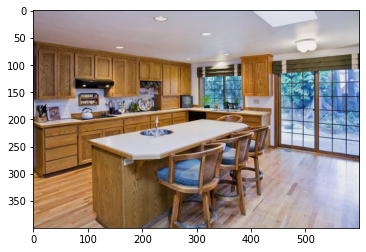

In [4]:
im = np.array(Image.open('../images/original/ADE_train_00010429.jpeg'))
im.shape

plt.imshow(im)

(400, 600, 3)
(400, 600)
[  0   1   4   6   9  11  15  20  45  48  64  68  74  83  90 130 134 143]
num of full-res pixel 97


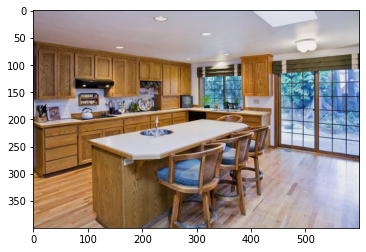

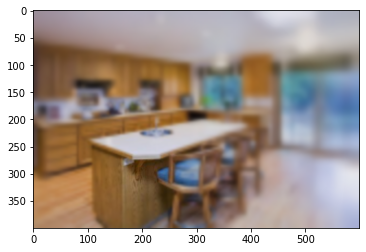

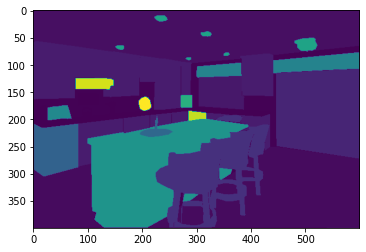

0 []
1 ['wall']
4 ['floor, flooring']
6 ['ceiling']
9 ['windowpane, window ']
11 ['cabinet']
15 ['door, double door']
20 ['chair']
45 ['chest of drawers, chest, bureau, dresser']
48 ['sink']
64 ['blind, screen']
68 ['book']
74 ['kitchen island']
83 ['light, light source']
90 ['television receiver, television, television set, tv, tv set, idiot box, boob tube, telly, goggle box']
130 ['dishwasher, dish washer, dishwashing machine']
134 ['hood, exhaust hood']
143 ['plate']


In [7]:
im_path = '../ADEChallengeData2016/images/training/ADE_train_00010429.jpg'
an_path = im_path.replace("images", "annotations").replace("jpg", "png")

im = np.array(Image.open(im_path))
an = np.array(Image.open(an_path))

print(im.shape)
print(an.shape)

print(np.unique(an))
xc, yc = im.shape[0]/2, im.shape[1]/2
fv = foveat_img(im, [(xc, yc)], sigma=0.4)


plt.imshow(im)
plt.show()
plt.imshow(fv)
plt.show()
plt.imshow(an)
plt.show()

for idx in np.unique(an):
    print(idx, df[df["Idx"] == idx]["Name"].values)

(400, 600, 3)
(400, 600)
[  0   1   4   6   9  11  15  20  45  48  64  68  74  83  90 130 134 143]
num of full-res pixel 0


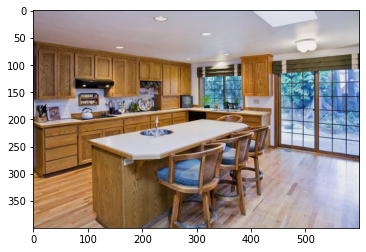

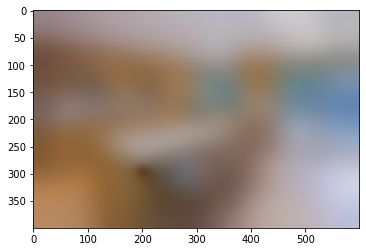

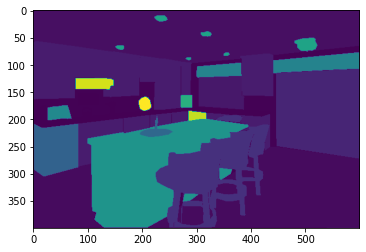

0 []
1 ['wall']
4 ['floor, flooring']
6 ['ceiling']
9 ['windowpane, window ']
11 ['cabinet']
15 ['door, double door']
20 ['chair']
45 ['chest of drawers, chest, bureau, dresser']
48 ['sink']
64 ['blind, screen']
68 ['book']
74 ['kitchen island']
83 ['light, light source']
90 ['television receiver, television, television set, tv, tv set, idiot box, boob tube, telly, goggle box']
130 ['dishwasher, dish washer, dishwashing machine']
134 ['hood, exhaust hood']
143 ['plate']


In [9]:
im_path = '../ADEChallengeData2016/images/training/ADE_train_00010429.jpg'
an_path = im_path.replace("images", "annotations").replace("jpg", "png")

im = np.array(Image.open(im_path))
an = np.array(Image.open(an_path))

print(im.shape)
print(an.shape)

print(np.unique(an))
xc, yc = im.shape[0]/2, im.shape[1]/2
fv = foveat_img(im, [(xc, yc)], sigma=4)


plt.imshow(im)
plt.show()
plt.imshow(fv)
plt.show()
plt.imshow(an)
plt.show()

for idx in np.unique(an):
    print(idx, df[df["Idx"] == idx]["Name"].values)

num of full-res pixel 0


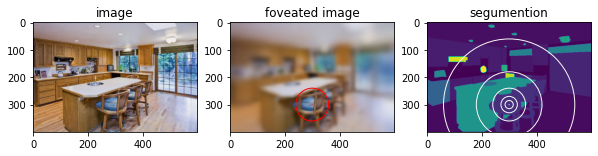

In [14]:
im_path = '../ADEChallengeData2016/images/training/ADE_train_00010429.jpg'
an_path = im_path.replace("images", "annotations").replace("jpg", "png")

fixs = (300,300)
im = np.array(Image.open(im_path))
an = np.array(Image.open(an_path))
fv = foveat_img(im, [fixs], sigma=0.6)


fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(10,8))

axes[0].set_title("image")
axes[0].imshow(im)

axes[1].set_title("foveated image")
axes[1].imshow(fv)

axes[2].set_title("segumention")
axes[2].imshow(an)
axes[2].add_patch(patches.Circle(xy=fixs, radius=0.5, ec='#f5f5f5', fill=False))
axes[2].add_patch(patches.Circle(xy=fixs, radius=15, ec='#f5f5f5', fill=False))
axes[2].add_patch(patches.Circle(xy=fixs, radius=30, ec='#f5f5f5', fill=False))
axes[2].add_patch(patches.Circle(xy=fixs, radius=60, ec='#f5f5f5', fill=False))
axes[2].add_patch(patches.Circle(xy=fixs, radius=120, ec='#f5f5f5', fill=False))
axes[2].add_patch(patches.Circle(xy=fixs, radius=240, ec='#f5f5f5', fill=False))

num of full-res pixel 97
num of full-res pixel 97
num of full-res pixel 97


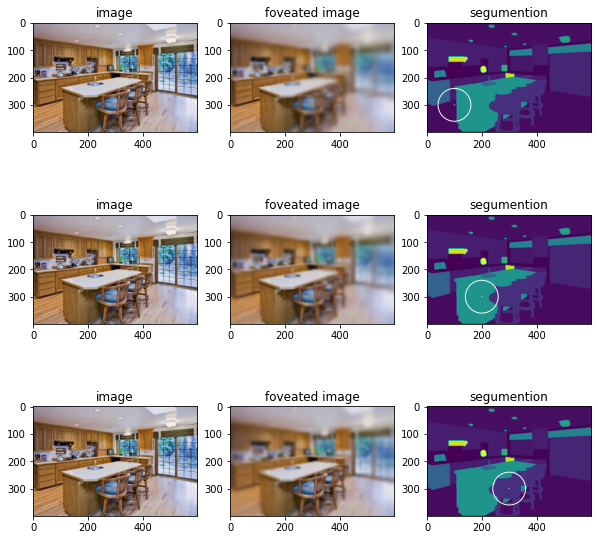

In [29]:
im_path = '../ADEChallengeData2016/images/training/ADE_train_00010429.jpg'
an_path = im_path.replace("images", "annotations").replace("jpg", "png")


im = np.array(Image.open(im_path))
an = np.array(Image.open(an_path))

fig, axes = plt.subplots(nrows=3, ncols=3,figsize=(10,10))

fixs = (100,300)
fv = foveat_img(im, [fixs], sigma=0.4)
axes[0,0].set_title("image")
axes[0,0].imshow(im)
axes[0,1].set_title("foveated image")
axes[0,1].imshow(fv)
axes[0,2].set_title("segumention")
axes[0,2].imshow(an)
axes[0,2].add_patch(patches.Circle(xy=fixs, radius=0.5, ec='#f5f5f5', fill=False))
axes[0,2].add_patch(patches.Circle(xy=fixs, radius=60, ec='#f5f5f5', fill=False))

fixs = (200,300)
fv = foveat_img(im, [fixs], sigma=0.4)
axes[1,0].set_title("image")
axes[1,0].imshow(im)
axes[1,1].set_title("foveated image")
axes[1,1].imshow(fv)
axes[1,2].set_title("segumention")
axes[1,2].imshow(an)
axes[1,2].add_patch(patches.Circle(xy=fixs, radius=0.5, ec='#f5f5f5', fill=False))
axes[1,2].add_patch(patches.Circle(xy=fixs, radius=60, ec='#f5f5f5', fill=False))

fixs = (300,300)
fv = foveat_img(im, [fixs], sigma=0.4)
axes[2,0].set_title("image")
axes[2,0].imshow(im)
axes[2,1].set_title("foveated image")
axes[2,1].imshow(fv)
axes[2,2].set_title("segumention")
axes[2,2].imshow(an)
axes[2,2].add_patch(patches.Circle(xy=fixs, radius=0.5, ec='#f5f5f5', fill=False))

axes[2,2].add_patch(patches.Circle(xy=fixs, radius=60, ec='#f5f5f5', fill=False))

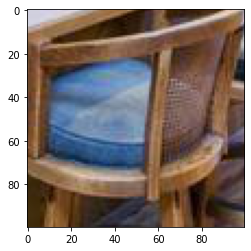

In [38]:
# Image cropping
im_path = '../ADEChallengeData2016/images/training/ADE_train_00010429.jpg'
im = Image.open(im_path)

window_size=100
w = window_size / 2
fixs = (300, 300)
yc, xc = fixs
box=(xc-w, yc-w, xc+w, yc+w) # (left, upper, right, lower)


im_crop = im.crop(box)
plt.imshow(im_crop)

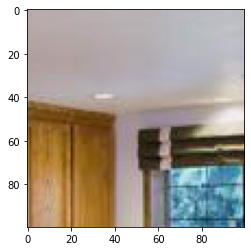

In [39]:
# Image cropping
im_path = '../ADEChallengeData2016/images/training/ADE_train_00010429.jpg'
im = Image.open(im_path)

window_size=100
w = window_size / 2
fixs = (100, 300)
yc, xc = fixs
box=(xc-w, yc-w, xc+w, yc+w) # (left, upper, right, lower)


im_crop = im.crop(box)
plt.imshow(im_crop)

In [ ]:
t